<a href="https://colab.research.google.com/github/sudhirtakke/EDA---MentalHealthinTechWorkspace/blob/main/EDA_MentalHealthinTechWorkspace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Table of Contents
- 1. [Problem Statement](#section1)</br>
    - 1.1 [Introduction](#section101)<br/>
    - 1.2 [Data source and data set](#section102)<br/>
- 2. [Load the packages and data](#section2)</br>
- 3. [Data profiling](#section3)</br>
    - 3.1 [dtypes](#section301)<br/>
    - 3.2 [head](#section302)<br/>
    - 3.3 [describe](#section303)<br/>
    - 3.4 [sample](#section304)<br/>
    - 3.5 [Pandas profiling](#section305)<br/>
    - 3.6 [Initial observations](#section306)<br/>
    - 3.7 [Final observations](#section307)<br/>
- 4. [Data normalization](#section4)</br>
    - 4.1 [Standardize column headers to lower case](#section401)<br/>
    - 4.2 [Convert timestamp to date-time](#section402)<br/>
    - 4.3 [Missing data and its imputation](#section403)<br/>
    - 4.4 [Outlier Treatment](#section404)<br/>
    - 4.5 [Handling NaN data in categorical variables](#section405)<br/>            
    - 4.6 [Grouping](#section406)<br/>
- 5. [Identify patterns in the data](#section5)</br>
    - 5.1 [Treatment vs work_interfere](#section501)<br/>
    - 5.2 [Age Category Vs seeking treatment](#section502)<br/>
    - 5.3 [Family history Vs Seeking treatment](#section503)<br/>
    - 5.4 [Employee count of Companies](#section505)<br/>
    - 5.5 [Employee Count Vs treatment](#section506)<br/>
    - 5.6 [Using Donut chart to check the relationship between Gender and Treatment](#section507)<br/>
    - 5.7 [Seaborn swarm plot](#section508)<br/>
- 6. [Analysis through questions](#section6)</br>
     - 6.1 [How does the frequency of mental health illness vary by geographic location?](#section601)<br/>
         - 6.1.1 [Which countries contribute the most?](#section602)<br/>
         - 6.1.2 [Which state contributes the most?](#section603)<br/>
         - 6.1.3 [What is the contribution of top 3 countries among all?](#section604)<br/>
         - 6.1.4 [What is the count and percentage of work interfere in work of the employees for the top 3 countries?](#section605)<br/>
         - 6.1.5 [What is the total number of employees going for treatment from the top 3 countries?](#section606)<br/>
         - 6.1.6 [ How many people did go for treatment on the basis of gender for the top 3 countries?](#section607)<br/>
     - 6.2 [Relationship between mental health and attitude.](#section608)<br/>
- 7. [Conclusion](#section7)<br/>

<a id=section1></a> 
## 1. Problem Statement 

"This dataset is from a 2014 survey that measures attitudes towards __mental health and frequency of mental health disorders in the tech workplace__."
<a id=section101></a> 
### 1.1. Introduction
The notebook has observations with each step in order to explain thoroughly how to approach the data set. Based on the observation some questions also are answered in the notebook for the reference though not all of them are explored in the analysis. 

<a id=section102></a> 
### 1.2. Data source and dataset

__a__. How was it collected? 

- __Name__: "Annual Mental Health in Tech Survey"
- __Sponsoring Organization__: Open Sourcing Mental Illness (OSMI)
- __Year__: 2014
- __Description__: "With over 1200 responses, we believe the 2014 __Mental Health in Tech Survey__ was the largest survey done on mental health in the tech industry." Since then, OSMI has conducted two more surveys, 2016 and 2017. 

__b__. Is it a sample? If yes, was it properly sampled?
- Yes, it is a sample. We don't have official information about the data collection method, but it appears *not* to be a random sample, so we can assume that it is not representative. 

<a id=section2></a> 
### 2. Load the packages and data 

#### Run this line in case you dont have pandas_profiling installed.
```python
!pip install pandas_profiling
```                                                  

In [ ]:
import sys                                                                      # Import packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline                                                              

import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

pd.set_option('display.max_columns', 100)                                       # Display all dataframe columns in outputs (it has 27 columns, which is wider than the notebook)
                                                                                # This sets it up to dispaly with a horizontal scroll instead of hiding the middle columns

mh = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Casestudy/survey.csv")                       # Load in the dataset as mh

<a id=section3></a> 
### 3. Data Profiling

Review the data types and sample data to understand what variables we are dealing with?<br>
Which variables need to be transformed in some way before they can be analyzed?

In [ ]:
mh.dtypes                                                                       # Display the data type for each variable

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

<a id=section302></a> 

In [ ]:
mh.head()                                                                      # Display the first five rows of the data set

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


<a id=section303><a/>

In [ ]:
mh.describe(include = 'all')                                                    # Descriptive statistics for the numerical variables

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1259,1.259000e+03,1259,1259,744,1241,1259,1259,995,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,164
unique,1246,NaN,49,48,45,2,2,2,4,6,2,2,3,3,3,3,3,5,3,3,3,3,3,3,3,2,160
top,2014-08-27 12:37:50,NaN,Male,United States,CA,No,No,Yes,Sometimes,6-25,No,Yes,Yes,No,No,No,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.
freq,2,NaN,615,751,138,1095,767,637,465,290,883,1031,477,501,842,646,819,563,490,925,774,516,1008,557,576,1075,5
mean,NaN,7.942815e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.818299e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,-1.726000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.700000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.100000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,3.600000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Observations

As we can see there is huge discrepancies in Age column of dataset. It is having _minimum value as -1726_ which in reality is not possible on the other hand side the _maximum limit is around 99999999_ which is not possible either, as the the age can't be less than 0 and till date maximum date recorded is 123.So we will work on this particular segment of 0-123. For the same we need to clean the data and remove the outliers.We have done this in __section 4.3__.

<a id=section304></a> 

In [ ]:
mh.sample(10)                                                                  # Display a random 10 rows from the data set

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
104,2014-08-27 12:22:55,29,Male,United States,NY,No,No,No,Never,More than 1000,No,Yes,Yes,Not sure,Yes,Don't know,Don't know,Somewhat easy,No,No,Some of them,Yes,No,No,Don't know,No,NaN
283,2014-08-27 14:10:47,35,male,United States,NY,No,Yes,Yes,Sometimes,26-100,No,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,Yes,No,No,Some of them,No,Maybe,Don't know,No,NaN
268,2014-08-27 13:55:16,37,Female,United States,CA,No,Yes,Yes,Often,26-100,No,Yes,Yes,Yes,No,No,Yes,Don't know,Maybe,No,Some of them,Some of them,No,Yes,Don't know,No,NaN
953,2014-08-29 01:40:36,36,Female,United States,WA,No,Yes,Yes,Rarely,6-25,No,Yes,Don't know,No,No,Don't know,Don't know,Don't know,Yes,Maybe,Some of them,No,No,No,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,No,Yes,Yes,Not sure,No,Don't know,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
363,2014-08-27 15:05:00,32,Male,United States,MI,No,Yes,Yes,Rarely,More than 1000,No,No,Yes,Yes,Yes,Yes,Yes,Don't know,No,No,Some of them,Yes,No,Yes,Yes,No,NaN
524,2014-08-27 17:22:29,36,M,United States,IL,Yes,Yes,Yes,Sometimes,1-5,Yes,Yes,Don't know,Yes,Don't know,No,Yes,Somewhat difficult,Maybe,No,Some of them,Yes,No,Yes,Yes,No,NaN
945,2014-08-29 00:05:07,39,Male,United States,AZ,No,Yes,Yes,Often,26-100,No,Yes,Yes,Yes,No,No,Yes,Don't know,Yes,No,Some of them,No,No,No,No,No,NaN
498,2014-08-27 16:28:20,54,Male,United Kingdom,NaN,No,No,Yes,Sometimes,More than 1000,Yes,No,No,Yes,Yes,Yes,Yes,Very easy,No,No,Yes,Yes,Maybe,Maybe,No,No,NaN
615,2014-08-28 00:05:34,30,Male,United States,GA,Yes,No,Yes,Often,6-25,Yes,Yes,No,Not sure,No,Yes,Don't know,Somewhat difficult,No,No,Yes,Yes,No,Maybe,Yes,No,NaN


<a id=section305><a/>

In [ ]:
#import pandas_profiling                                                      # Get a quick overview for all the variables using pandas_profiling                                         
#profile = pandas_profiling.ProfileReport(mh)
#profile.to_file(outputfile="myoutputfile.html")                              # HTML file will be downloaded to your workspace

<a id=section306></a> 
### 3.6. Initial observations:

- Summary of data types in this dataset:
 - <em>Numeric</em>: <strong>Age</strong> (integer)
 - <em>Object</em>: Everything else
- <strong>Gender</strong> has 49 distinct responses. Group the responses into fewer categories. 
- <strong>Age</strong> has some values that are too low or too high to be real ages.
- The following variables have null values that may need to addressed.
 - <strong>state</strong>:  This should be null only when <strong>country</strong> is something other than the US
 - <strong>self_employed</strong>: There are 18 missing values. We need to investigate why.
 - <strong>work-interfere</strong>:  There are 264 missing values. The question begins with "If you have a mental health condition,..." so lets assume that those who did not respond, did so because they do not have a mental health condition currently. This is an imperfect assumption since we can't know that for sure; and because some people may have felt the need to respond even if they don't have a mental health condition, if they did not feel comfortable they left the question blank.
 - <strong>comments</strong>: There are 1095 missing values. It was an optional text box so it's reasonable to expect that many (most) respondents would leave it blank. We may be able to learn something by doing a text analysis on the submitted comments: are there themes that come up in the comments that would inform the next version of the survey - for example, a popular theme might justify creating its own multiple-choice question next time.


#### Explore the numeric variable Age to confirm whether all values are within a reasonable range and if any are NaN.

In [ ]:
print("'Age'")                                                                
print("Minimum value: ", mh["Age"].min())
print("Maximum value: ", mh["Age"].max())
print("How many values are NaN?: ", pd.isnull(mh['Age']).sum())

'Age'
Minimum value:  -1726
Maximum value:  99999999999
How many values are NaN?:  0


In [ ]:
mh.Age.max()
a=mh.Age[mh.Age>123]
b=mh.Age[mh.Age<0]
print(a)
print(b)

364            329
390    99999999999
Name: Age, dtype: int64
143      -29
715    -1726
1127      -1
Name: Age, dtype: int64


#### Count the number of distinct responses and list them.

In [ ]:
print("Count of distinct responses for Gender:", len(set(mh['Gender'])))      # Learn more about the variable Gender, which appears not to be standardized with 49 distinct responses.
print("Distinct responses for Gender:", set(mh['Gender']))                    

Count of distinct responses for Gender: 49
Distinct responses for Gender: {'Male', 'Enby', 'Trans woman', 'female', 'm', 'Female (cis)', 'Trans-female', 'Female (trans)', 'f', 'queer', 'Female ', 'Male (CIS)', 'Guy (-ish) ^_^', 'queer/she/they', 'Nah', 'woman', 'Female', 'Cis Female', 'Agender', 'Male-ish', 'cis-female/femme', 'Cis Male', 'fluid', 'Male ', 'Femake', 'Make', 'Man', 'maile', 'non-binary', 'A little about you', 'All', 'Woman', 'cis male', 'male', 'p', 'ostensibly male, unsure what that really means', 'Neuter', 'M', 'male leaning androgynous', 'Mail', 'F', 'Mal', 'Androgyne', 'Malr', 'something kinda male?', 'msle', 'femail', 'Genderqueer', 'Cis Man'}


<a id=section307></a> 
### 3.7. Final observations 

- Variables to transform prior to analysis:
 - Standardize all column headers to lower case (to prevent typos!)
  - __Timestamp__: convert to datetime
 - __Age__: remove outliers as it is visible that the age column have two outliers as _329, 999999999999, -1, -1729 and -29_.
 - __Gender__: group into standardized categories 
- It will be important to decide how to handle NaN values.


<a id=section4></a> 
### 4. Data Normalization

<a id=section401><a/>

### 4.1. Standardize all column headers to lower case 

In [ ]:
mh.columns = map(str.lower, mh.columns)                                  # map() function returns a list of results after applying the given function
                                                                         # to each item of a given iterable.
mh.dtypes                                                                # Confirm that all variable names are now lower case

timestamp                    object
age                           int64
gender                       object
country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

<a id=section402></a> 
### 4.2. Convert "timestamp" to datetime

In [ ]:
mh['timestamp'] = pd.to_datetime(mh['timestamp'])                        # Convert "timestamp" data type from object to datetime                      
mh.dtypes                                                               

timestamp                    datetime64[ns]
age                                   int64
gender                               object
country                              object
state                                object
self_employed                        object
family_history                       object
treatment                            object
work_interfere                       object
no_employees                         object
remote_work                          object
tech_company                         object
benefits                             object
care_options                         object
wellness_program                     object
seek_help                            object
anonymity                            object
leave                                object
mental_health_consequence            object
phys_health_consequence              object
coworkers                            object
supervisor                           object
mental_health_interview         

<a id=section403></a>
### 4.3. Missing Data and its imputation

In [ ]:
#missing data
total = mh.isnull().sum().sort_values(ascending=False)
percent = (mh.isnull().sum()/mh.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                           Total   Percent
comments                    1095  0.869738
state                        515  0.409055
work_interfere               264  0.209690
self_employed                 18  0.014297
benefits                       0  0.000000
age                            0  0.000000
gender                         0  0.000000
country                        0  0.000000
family_history                 0  0.000000
treatment                      0  0.000000
no_employees                   0  0.000000
remote_work                    0  0.000000
tech_company                   0  0.000000
care_options                   0  0.000000
obs_consequence                0  0.000000
wellness_program               0  0.000000
seek_help                      0  0.000000
anonymity                      0  0.000000
leave                          0  0.000000
mental_health_consequence      0  0.000000
phys_health_consequence        0  0.000000
coworkers                      0  0.000000
supervisor 

In [ ]:
#dealing with missing data
#Let’s get rid of the variables "Timestamp",“comments”, just to make our lives easier.
mh = mh.drop(['comments'], axis= 1)
mh = mh.drop(['timestamp'], axis= 1)

mh.head(5)

,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


<a id=section404></a> 
### 4.4. Outliers Treatment

For the purpose of this analysis, simply replace any __out-of-range age values with "NaN"__, rather than deleting the rows from the data set.  In a more detailed analysis it could be worth looking more closely at the rows with out-of-range ages and deciding whether it makes more sense to remove them. 

As we recall the age column had __5 outliers__, _3 below zero_ and _2 above 123_. Let us see how to handle them.


In [ ]:
def clean_age(age):                                                     # Create a new column "age_clean" that replaces out-of-range ages with "NaN"
    if age>=0 and age<=123:                                             # The oldest living person on record lived to be 122 years, 164 days (Jeanne Calment, 1875-1997)
        return age
    else:
        return np.nan
mh['age_clean'] = mh['age'].apply(clean_age)

print("'Age'")                                                          # Check out the new column and make sure it looks right
print("Minimum value: ", mh["age_clean"].min())
print("Maximum value: ", mh["age_clean"].max())
print("How many values are NaN?: ", pd.isnull(mh['age_clean']).sum())
print("Frequency table for age_clean:")
mh["age_clean"].value_counts().sort_index(0)

'Age'
Minimum value:  5.0
Maximum value:  72.0
How many values are NaN?:  5
Frequency table for age_clean:


5.0      1
8.0      1
11.0     1
18.0     7
19.0     9
20.0     6
21.0    16
22.0    21
23.0    51
24.0    46
25.0    61
26.0    75
27.0    71
28.0    68
29.0    85
30.0    63
31.0    67
32.0    82
33.0    70
34.0    65
35.0    55
36.0    37
37.0    43
38.0    39
39.0    33
40.0    33
41.0    21
42.0    20
43.0    28
44.0    11
45.0    12
46.0    12
47.0     2
48.0     6
49.0     4
50.0     6
51.0     5
53.0     1
54.0     3
55.0     3
56.0     4
57.0     3
58.0     1
60.0     2
61.0     1
62.0     1
65.0     1
72.0     1
Name: age_clean, dtype: int64

In [ ]:
mh['age_Group'] = pd.cut(mh['age_clean'].dropna(),
                         [0,18,25,35,45,99],
                         labels=['<18','18-24','25-34','35-44','45+'], include_lowest=True)

#### Question that comes up:
- How does __age__ relate to various behaviors and/or their awareness of their employer's attitude toward mental health?(__Hint__:Based on age group)

Text(0.5, 1.0, 'Age Group vs Treatment')

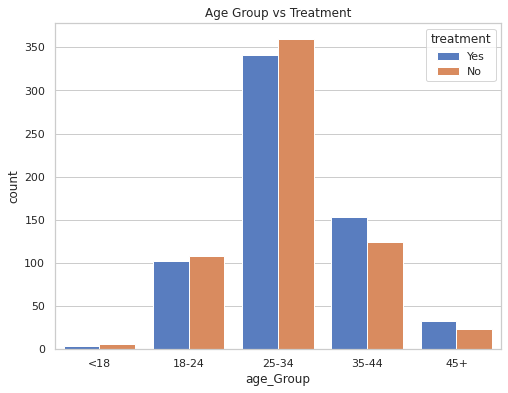

In [ ]:
fig,ax =plt.subplots(figsize=(8,6))
sns.countplot(data = mh,x = 'age_Group', hue='treatment')
plt.title('Age Group vs Treatment')

#### Observations:
It can be infered from the above plot that the __Age_group 2(18-24) is mildly concious, 4(35-44) is heavily concious and 3 (25-34)__ are lesser compared to previous about their mental issue and are up for treatment.


#### View the age distribution of the sample

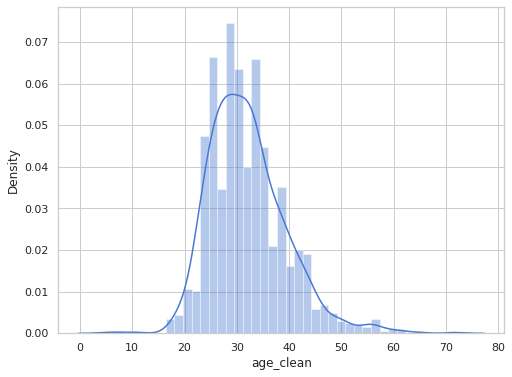

In [ ]:
fig,ax =plt.subplots(figsize=(8,6))
sns.set(color_codes=True)                                                # Plot a histogram of the respondents' ages (remove any NaN values)
sns.set_palette(sns.color_palette("muted"))

sns.distplot(mh["age_clean"].dropna());

#### Observations
- Peak between _mid-20s to about mid-30s_.  

<a id=section405></a>
### 4.5. Handling NaN data in the categorical columns
- There are three variables with many missing values. None of them points to a need to "fill in" the missing responses or delete the rows. More detail:
 - __state__:  the missing values are likely to occur in the instances where the country is not "United States". 
 - __work_intefere__:  the missing values indicate that the respondent skipped the question because it does not apply to them, which is important information. We can infer that missing responses means the respondent is not experiencing a mental illness at the moment.
 - __self_employed__: there are 18 missing values and it indicates the respondent may have left the column, as this column so it hold much of a importance to analysis, So it's better to impute with values in order to make the data normal.

In [ ]:
#There are only 0.014% of self employed so let's replace NaN with mode()
#Replace "NaN" string from defaultString
mh['self_employed'] = mh['self_employed'].fillna(mh['self_employed'].mode()[0])
print(mh['self_employed'].unique())

['No' 'Yes']


In [ ]:
#There are only 0.20% of self work_interfere so let's replace NaN with mode()
#Replace "NaN" string from defaultString

mh['work_interfere'] = mh['work_interfere'].fillna(mh['work_interfere'].mode()[0])
print(mh['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes']


<a id=section406></a> 
### 4.6. Grouping
#### Gender Distribution

Consolidate the gender variable into the following categories, given the _nature_ and _quantities_ of the __open-ended responses__.
- Male
- Female
- Trans


In [ ]:
#clean 'Gender'
#Slower case all columm's elements
gender = mh['gender'].str.lower()
#print(gender)

#Select unique elements
gender = mh['gender'].unique()

#Made gender groups
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]           
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

for (row, col) in mh.iterrows():

    if str.lower(col.gender) in male_str:
        mh['gender'].replace(to_replace=col.gender, value='male', inplace=True)

    if str.lower(col.gender) in female_str:
        mh['gender'].replace(to_replace=col.gender, value='female', inplace=True)

    if str.lower(col.gender) in trans_str:
        mh['gender'].replace(to_replace=col.gender, value='trans', inplace=True)

#Get rid of bullshit
stk_list = ['A little about you', 'p']
mh = mh[~mh['gender'].isin(stk_list)]

print(mh['gender'].unique())

['female' 'male' 'trans']


### Gender distribution of the sample

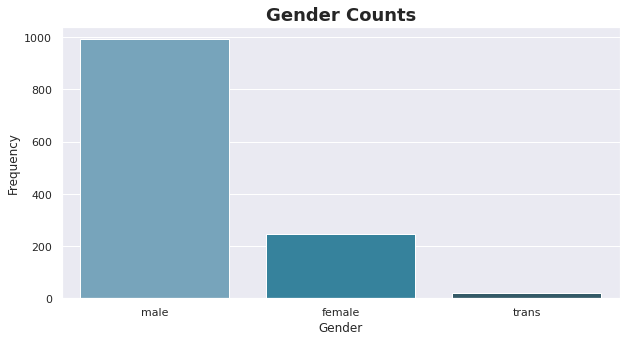

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot('gender',data = mh, order = mh['gender'].value_counts().index,palette="PuBuGn_d")
plt.title("Gender Counts",fontsize=18,fontweight="bold")
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

#### Question that comes up:
- How does __gender__ relate to various behaviors and/or their awareness of their employer's attitude toward mental health?

Text(0.5, 1.0, 'treatment (trans)')

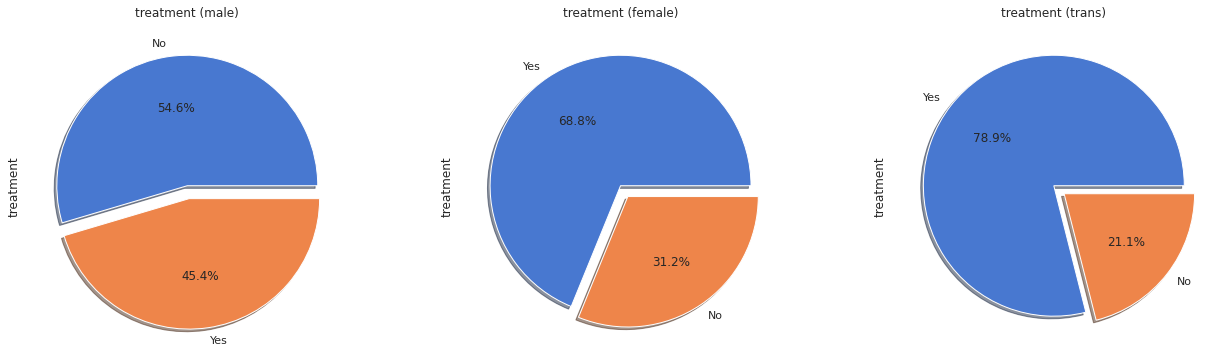

In [ ]:
f,ax = plt.subplots(1,3,figsize=(22,6))
mh['treatment'][mh['gender'] == 'male'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
mh['treatment'][mh['gender'] == 'female'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[1],shadow=True)
mh['treatment'][mh['gender'] == 'trans'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[2],shadow=True)
ax[0].set_title('treatment (male)')
ax[1].set_title('treatment (female)')
ax[2].set_title('treatment (trans)')

#### Observations

__Female__ and __trans__ is more affected than males in ratio terms .

#### Pandas profiling post data manipulation

In [ ]:
#post_profile = pandas_profiling.ProfileReport(mh)
#post_profile.to_file(outputfile="post_profiling.html")

#### Create a copy of "mh" dataframe for Label encoding

In [ ]:
mh_new = mh.copy(deep=True)                                                       # creating new dataframe to make any datatype changes over it and keep the original dataframe as it is..

#### Dealing with Categorical Variables

In [ ]:
from sklearn.preprocessing import LabelEncoder                                    # Label encoder is used to transform non-numerical labels to numerical labels.
number = LabelEncoder()                                                           # Here as our data set consists only of categorical values except age
for i in mh_new.columns:                                                          # in order to find the correlation between variables, we do Label encoding 
    mh_new[i] = number.fit_transform(mh_new[i].astype('str'))

<a id=section406><a/>

#### Correlation of Features

In [ ]:
corr=mh_new.corr()['treatment']
corr[np.argsort(corr,axis=0)[::-1]]

treatment                    1.000000
family_history               0.376714
care_options                 0.235135
benefits                     0.224767
obs_consequence              0.154008
anonymity                    0.140905
work_interfere               0.136273
mental_health_interview      0.094859
wellness_program             0.092346
seek_help                    0.087700
country                      0.080096
age_clean                    0.076312
age                          0.074897
coworkers                    0.066022
mental_vs_physical           0.060552
leave                        0.059034
age_Group                    0.051030
phys_health_interview        0.049234
mental_health_consequence    0.027943
remote_work                  0.024593
self_employed                0.016264
phys_health_consequence     -0.012776
tech_company                -0.032295
supervisor                  -0.037944
no_employees                -0.047733
state                       -0.099801
gender      

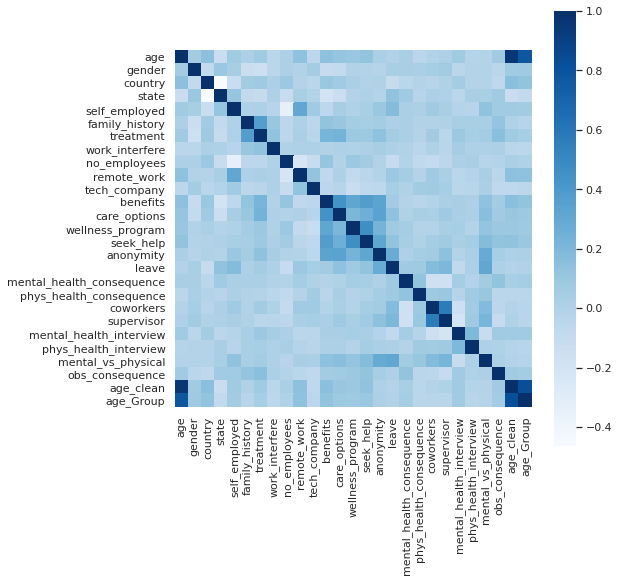

In [ ]:
features_correlation = mh_new.corr()
plt.figure(figsize=(8,8))
sns.heatmap(features_correlation,vmax=1,square=True,annot=False,cmap='Blues')
plt.show()

#### Observation

__benefits__,__care_options__,__wellness_program__,__seek_help__ and __anonymity__ are correalated with __each other__ and same with __coworkers and supervisor__

<a id=section5><a/>

### 5. Identify patterns in the data

<a id=section501><a/>

### 5.1. Treatment v. work_interfere

Text(0.5, 1.0, 'work_interfere (Sometimes)')

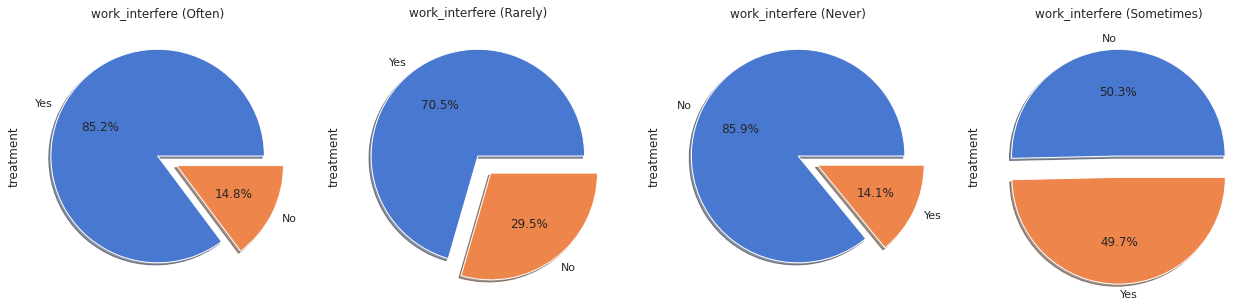

In [ ]:
f,ax = plt.subplots(1,4,figsize=(22,7))
mh['treatment'][mh['work_interfere'] == 'Often'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
mh['treatment'][mh['work_interfere'] == 'Rarely'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
mh['treatment'][mh['work_interfere'] == 'Never'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[2],shadow=True)
mh['treatment'][mh['work_interfere'] == 'Sometimes'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[3],shadow=True)
ax[0].set_title('work_interfere (Often)')
ax[1].set_title('work_interfere (Rarely)')
ax[2].set_title('work_interfere (Never)')
ax[3].set_title('work_interfere (Sometimes)')

#### Observation

So the employees who are __"Often"__ and __"Rarely"__ interferred during their work are more likely to have mental health issue and they tend to go for treatment.

In [ ]:
df = pd.DataFrame({'treatment': mh['treatment'], 'work_interfere': mh['work_interfere']}, dtype='category')         # Create a new dataframe with the two columns and assign numbers in place of their categories
df_num = df.apply(lambda x: x.cat.codes)

print("Pearson:", df_num.corr())                                                                                    # Run a correlation calculation 
print("")

Pearson:                 treatment  work_interfere
treatment        1.000000        0.136273
work_interfere   0.136273        1.000000



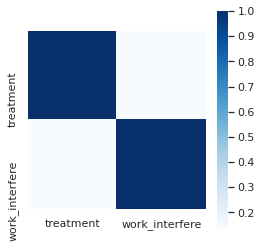

In [ ]:
features = df_num.corr()
plt.figure(figsize=(4,4))
sns.heatmap(features,vmax=1,square=True,annot=False,cmap='Blues')
plt.show()

<a id=section502><a/>

### 5.2. Age Category v. seeking treatment

Whether an employee is seeking treatment for a mental health condition appears to be correlated with their knowledge of their employer's mental health benefits.


Text(0.5, 1.0, 'Age Category Vs. Seeking Treatment')

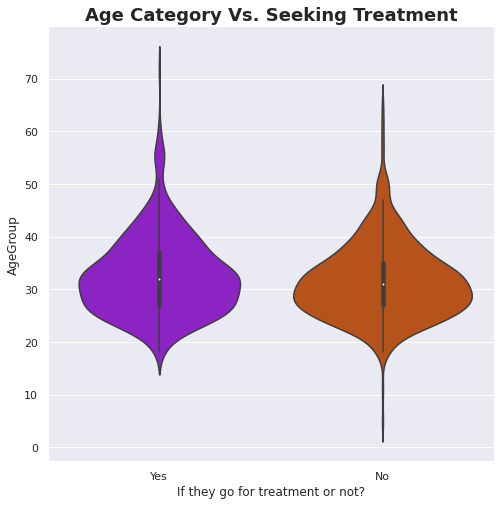

In [ ]:
plt.figure(figsize=(8,8))
ax = sns.violinplot(x="treatment", y="age_clean", palette="gnuplot", data=mh)
plt.xlabel("If they go for treatment or not?")
plt.ylabel("AgeGroup")
plt.title("Age Category Vs. Seeking Treatment", fontsize=18, fontweight = "bold")

### Observation
What inferences are you getting from the above violin plot? <br/>
Nothing much, Right? <br/>
Therefore, what type of plot you have to use depends on the data you are working on. You can't use every plot everywhere. Every plot has its own utility and its best to keep in mind the data on which you are working on and check which chart is feasible as per your requirement nad visualization.



<a id=section503><a/>

### 5.3. Family History v. Seeking Treatment

There appears to be a pretty clear correlation between these two variables, too.

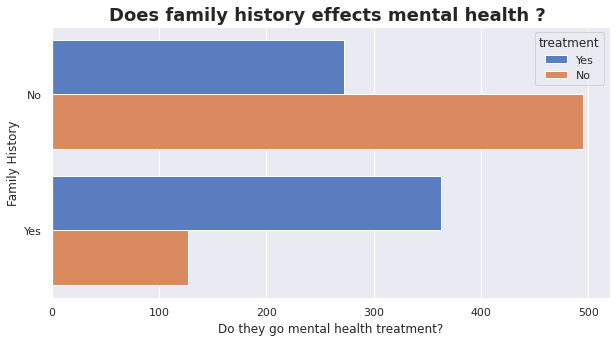

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(y="family_history", hue="treatment", data=mh)
plt.title("Does family history effects mental health ? ",fontsize=18,fontweight="bold")
plt.xlabel("Do they go mental health treatment?")
plt.ylabel("Family History")
plt.show()

### Observation

The employees _having_ Family History are very much likely to go for treatment.

<a id=section504><a/>

<a id=section505><a/>

<a id=section505><a/>

### 5.4. Employee count of Comapnies

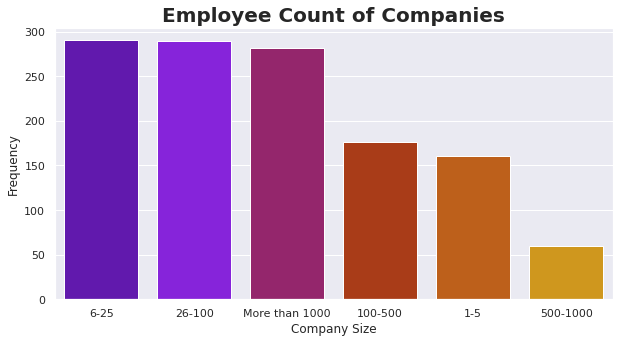

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot('no_employees',data = mh, order = mh['no_employees'].value_counts().index,palette="gnuplot")
plt.title("Employee Count of Companies",fontsize=20,fontweight="bold")
plt.ylabel("Frequency")
plt.xlabel("Company Size")
plt.show()

### Observation
Company Size of _6-25_ has the __highest frequency__ of employees and the one having employee in the range of _500-1000_ has the __least frequency__ among the data set.

Text(0, 0.5, 'Count')

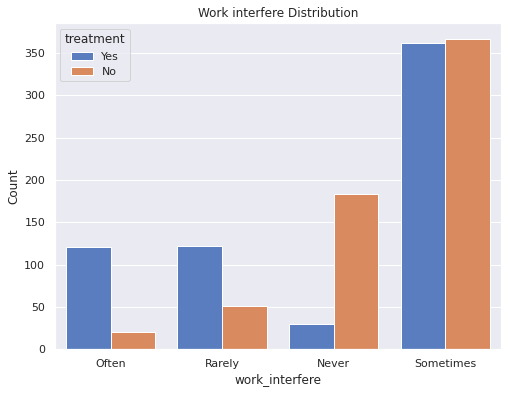

In [ ]:
fig,ax  =plt.subplots(figsize=(8,6))
sns.countplot(mh['work_interfere'].dropna(), hue = mh['treatment'], data = mh, ax=ax)
plt.title('Work interfere Distribution')
plt.ylabel('Count')

### Observation
The workers are interfered __sometimes__ for the _maximum number_ of time and __often__  for the _least number_ of times.

<a id=section506><a/>

### 5.5. Employee Count vs Treatment

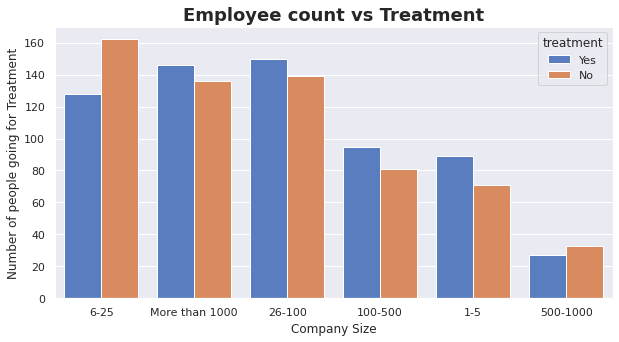

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot("no_employees", hue="treatment", data=mh)
plt.title("Employee count vs Treatment",fontsize=18,fontweight="bold")
plt.ylabel("Number of people going for Treatment")
plt.xlabel("Company Size")
plt.show()

### Observation
The _maximum number_ of _people going for treatment_ belongs to __Company Size 26-100__ and those _not going for treatment belongs_ to __Company Size 6-25__.

<a id=section507><a/>

### 5.6.Using _donut pie chart_ to see the relationship between _Gender_ and _Treatment_.

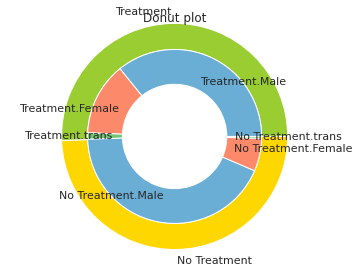

In [ ]:
group_names=['Treatment', 'No Treatment']
group_size=[637,622]
subgroup_names=['Treatment.Male','Treatment.Female','Treatment.trans','No Treatment.Male','No Treatment.Female','No Treatment.trans']
subgroup_size=[450,170,15,541,77,4]
 
# Create colors
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors = ['yellowgreen', 'gold'])
plt.setp( mypie, width=0.3, edgecolor='white')

# wedges, texts, autotexts = ax.pie(group_size, autopct=lambda pct: func(pct, data),
                                  #textprops=dict(color="w"))
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.5), b(0.4), c(0.5), a(0.5), b(0.4), c(0.5)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
plt.title('Donut plot')
# show it
plt.show()

<a id=section508><a/>

### 5.7. Using _seaborn swarm plot_

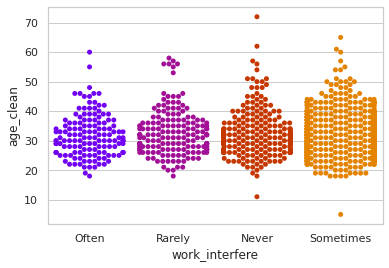

In [ ]:
sns.set(style="whitegrid", palette="muted")


# "Melt" the dataset to "long-form" or "tidy" representation
pd.melt(mh, "work_interfere")

# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="work_interfere", y="age_clean", 
              palette='gnuplot', data=mh)

### Observation
Workers of age range between 25-40 years are interfered in their work __"sometimes"__ for the maximum number of time. 

<a id=section509><a/>

<a id=section6></a>
### 6. Analysis through questions

<a id=section601><a/>

### 6.1.  How does the frequency of mental health illness vary by geographic location?

Explore the __state__ data and its relationship to the frequency of mental health illness. A response to __work_interfere__ will be inferred to mean that the respondent experienced a mental health condition at the time of their response. From a non-response I will infer the non-existence of a mental health condition. 

<a id=section602><a/>

#### 6.1.1. Which countries contributes the most?

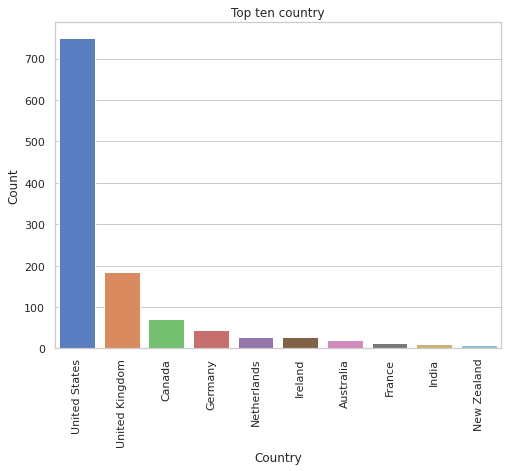

In [ ]:
from collections import Counter
country_count = Counter(mh['country'].dropna().tolist()).most_common(10)
country_idx = [country[0] for country in country_count]
country_val = [country[1] for country in country_count]
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = country_idx,y=country_val ,ax =ax)
plt.title('Top ten country')
plt.xlabel('Country')
plt.ylabel('Count')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

In [ ]:
country_count = Counter(mh['country'].dropna().tolist()).most_common(10)
country_count

[('United States', 750),
 ('United Kingdom', 185),
 ('Canada', 72),
 ('Germany', 45),
 ('Netherlands', 27),
 ('Ireland', 27),
 ('Australia', 21),
 ('France', 13),
 ('India', 10),
 ('New Zealand', 8)]

#### Observation

As from the above plot it can be seen that __US__ contributed the most with __751 respondents__ and now further exploring the states of US

<a id=section603><a/>

#### 6.1.2. Which state contributes the most?

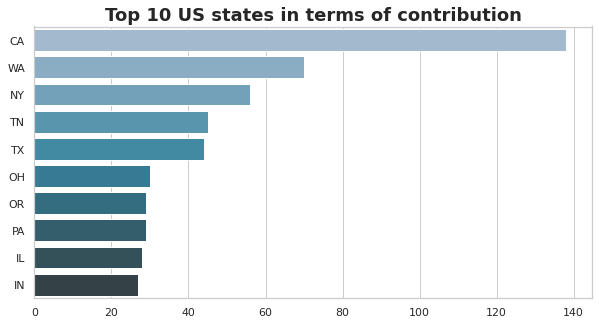

In [ ]:
usa = mh.loc[mh['country'] == 'United States']
top_10_statesUS = usa['state'].value_counts()[:10].to_frame()
plt.figure(figsize=(10,5))
sns.barplot(top_10_statesUS['state'],top_10_statesUS.index,palette="PuBuGn_d")
plt.title('Top 10 US states in terms of contribution',fontsize=18,fontweight="bold")
plt.xlabel('')
plt.show()

#### Observation

__CALIFORNIA__ is the state contributing the most in the survey with __138 respndents__.

In [ ]:
usa['state'].value_counts()[:10].to_frame()

,state
CA,138
WA,70
NY,56
TN,45
TX,44
OH,30
OR,29
PA,29
IL,28
IN,27


<a id=section604><a/>

#### 6.1.3 What is the contribution of top3 countries among all?

In [ ]:
#can = data.loc[data['Country']=='Canada']
#us = data.loc[data['Country']=='United States']
#uk = data.loc[data['Country']=='United Kingdom']
countries = pd.concat([mh.loc[mh['country']=='Canada'], mh.loc[mh['country']=='United States'], mh.loc[mh['country']=='United Kingdom']]).reset_index(drop=True)
print('There consists {} people from the top 3 countries out of the {} people surveyed'.format(countries.shape[0], mh.shape[0]))

There consists 1007 people from the top 3 countries out of the 1257 people surveyed


<a id=section605><a/>

#### 6.1.4. What is the count and percentage of work interfere in work of the employees for the top 3 countries?

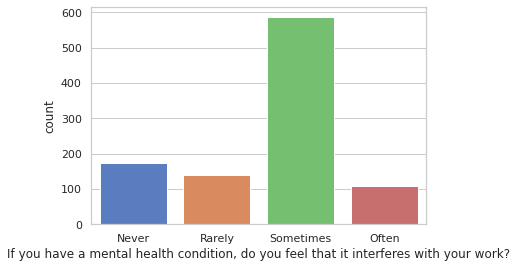

In [ ]:
sns.countplot(x=countries['work_interfere'], order=['Never', 'Rarely', 'Sometimes', 'Often']);
plt.xlabel('If you have a mental health condition, do you feel that it interferes with your work?');

In [ ]:
work_sum = countries['work_interfere'].value_counts().reset_index()
more_than_never = work_sum['work_interfere'][0] + work_sum['work_interfere'][2] + work_sum['work_interfere'][3]
print('{} people, or {:.1%}, believe that their mental health condition interferes with their work either sometimes or more'.format(more_than_never, more_than_never/countries.shape[0]))
print('With {} ({:.1%}) people saying it intereferes often'.format(work_sum['work_interfere'][3], work_sum['work_interfere'][3]/countries.shape[0]))

834 people, or 82.8%, believe that their mental health condition interferes with their work either sometimes or more
With 109 (10.8%) people saying it intereferes often


<a id=section606><a/>

#### 6.1.5. What is the total number of employees going for treatment from the top 3 countries?

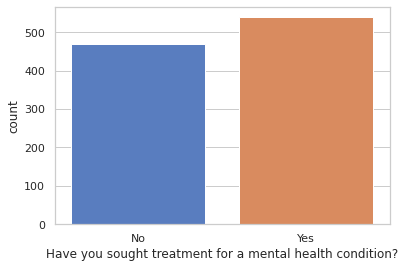

In [ ]:
#rcParams['figure.figsize'] = 8, 6
sns.countplot(countries['treatment']);
plt.xlabel('Have you sought treatment for a mental health condition?');

In [ ]:
treatment_count = countries['treatment'].value_counts().reset_index()
print('Luckily {} ({:.1%}) have sought treatment for their mental health issues'.format(treatment_count['treatment'][0], treatment_count['treatment'][0]/countries.shape[0]))

Luckily 539 (53.5%) have sought treatment for their mental health issues


<a id=section607><a/>

#### 6.1.6. How many people did go for treatment on the basis of gender for the top 3 countries?

In [ ]:
male = countries.loc[countries['gender']=='male']
male_treatment = male.loc[male['treatment']=='Yes'].reset_index(drop=True)

female = countries.loc[countries['gender']=='female']
female_treatment = female.loc[female['treatment']=='Yes'].reset_index(drop=True)

trans = countries.loc[countries['gender']=='trans']
trans_treatment = trans.loc[trans['treatment']=='Yes'].reset_index(drop=True)

print('Out of {} males surveyed, {} ({:.1%}) sought treatment'.format(male.shape[0], male_treatment.shape[0], male_treatment.shape[0]/male.shape[0]))
print('Out of {} females surveyed, {} ({:.1%}) sought treatment'.format(female.shape[0], female_treatment.shape[0], female_treatment.shape[0]/female.shape[0]))
print('Out of {} people who identify as anything other than male or female surveyed, {} ({:.1%}) sought treatment'.format(trans.shape[0], trans_treatment.shape[0], trans_treatment.shape[0]/trans.shape[0] ))

Out of 772 males surveyed, 371 (48.1%) sought treatment
Out of 220 females surveyed, 156 (70.9%) sought treatment
Out of 15 people who identify as anything other than male or female surveyed, 12 (80.0%) sought treatment


<a id=section608><a/>

### 6.2. Relationship between mental health and attitude.

Explore the __mental_health_consequences__ data . A __"No"__ response to __mental_health_consequence__  ("Do you think that discussing a mental health issue with your employer would have negative consequences?") will be inferred to represent __positive__ attitudes toward mental health, while a __"Yes"__ response will represent __negative__ attitudes.

col_0      count
attitudes       
Moderate     477
Negative     290
Positive     490
If we didn't miss anything, this will equal 1257: 1257
AxesSubplot(0.125,0.125;0.775x0.755)


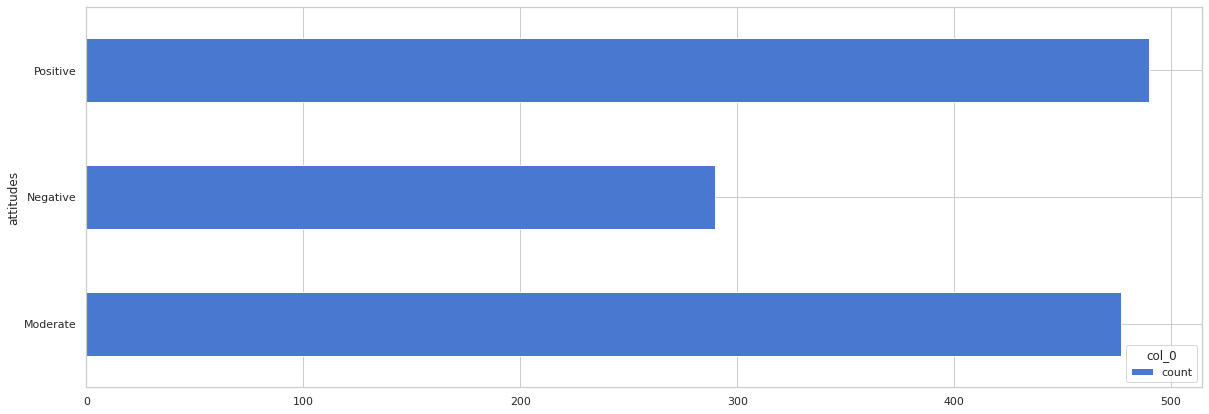

In [ ]:
                                                                                                         # Convert the mental_health_consequence responses into a new variable, 

mh['attitudes'] = mh['mental_health_consequence']                                                        # Make a copy of the column to preserve the original data. Work with the new column going forward.

positive = ["No"]                                                                                        # Assign each type of response to one of two categories
negative = ["Yes"]
moderate = ['Maybe']

mh['attitudes'] = mh['attitudes'].apply(lambda x:"Positive" if x in positive else x)
mh['attitudes'] = mh['attitudes'].apply(lambda x:"Negative" if x in negative else x)
mh['attitudes'] = mh['attitudes'].apply(lambda x:"Moderate" if x in moderate else x)


attitudes_tab = pd.crosstab(index=mh["attitudes"], columns="count")                                      # Make a crosstab to view the count for each of the new categories

print(attitudes_tab)

print("If we didn't miss anything, this will equal 1257:", len(mh['attitudes']))                         # Confirm that we didn't miss any entries

print(attitudes_tab.plot(kind="barh", 
                 figsize=(20,7),
                 stacked=True))

<a id=section7></a> 

### Conclusion

- The Mental Health Survrey being conducted helps us to know the __mental condition__ of employee working in _Tech firms_ across the participating countries.(__From: Section 1.2__)
- Total of __1297__ entries were made during the survey out of which __1007__ contributions were from the _top 3 countries_ in the survey. (__From: Section 6.1.3__)
- The __United States__ lead the chart in terms of participation in the survey followed by _United Kingdom_ and _Canada_.(__From: Section 6.1.1__)
- __California__ lead the chart when analysis was run down on the basis of states.(__From: Section 6.1.2__)
- __48.1% of male__, __70% of females__ and __12% of trans__ did sought for the __treatment__ among the others who participated in survey respectively.(__From: Section 6.1.6__)
- From the analyis, it was concluded that __family history, work interfere, no of employees in the company and age category__ were the main parameters _affecting the mental health and thus requiring treatment_.(__Collectively From: 5.1, 5.2, 5.3, 5.4__)